In [279]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import json
import matplotlib.pyplot as plt
from pathlib import Path

load_dotenv()

True

In [280]:
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [281]:
current_date = pd.Timestamp("2021-01-19", tz="America/New_York").isoformat()
tickers = ["AAPL", "TSLA", "AMZN", "DIS", "FB", "GOOGL", "GE", "NIO", "F", "MSFT"]
timeframe = "1D"

df_ticker = alpaca.get_barset(tickers, timeframe,start=current_date).df

close_prices_df = pd.DataFrame()

for ticker in tickers:
        close_prices_df[ticker] = df_ticker[ticker]['close']

close_prices_df

,AAPL,TSLA,AMZN,DIS,FB,GOOGL,GE,NIO,F,MSFT
time,,,,,,,,,,
2021-01-19 00:00:00-05:00,127.8200,844.50,3121.00,172.2500,261.08,1784.38,11.4300,58.4500,10.0300,216.4400
2021-01-20 00:00:00-05:00,131.9700,850.65,3264.73,173.6100,267.35,1880.06,11.3700,57.7100,10.8600,224.1800
2021-01-21 00:00:00-05:00,136.8700,844.97,3307.21,171.3400,272.89,1885.50,11.0800,58.3200,11.5278,224.9000
2021-01-22 00:00:00-05:00,138.9699,846.50,3290.00,172.7300,274.53,1892.16,11.1100,61.9500,11.5200,225.8400
2021-01-25 00:00:00-05:00,142.9000,880.81,3293.10,171.9350,278.00,1894.28,11.0000,59.9900,11.2850,229.5200
...,...,...,...,...,...,...,...,...,...,...
2021-05-03 00:00:00-04:00,132.5563,684.79,3386.49,185.5400,322.60,2343.11,13.4599,39.5500,11.6250,251.8801
2021-05-04 00:00:00-04:00,127.9300,674.18,3312.65,184.2811,318.43,2306.64,13.1300,37.9199,11.4200,247.9300
2021-05-05 00:00:00-04:00,128.1600,671.28,3271.17,181.5000,315.02,2315.68,13.2100,37.7001,11.6200,246.5100


In [282]:
daily_returns = close_prices_df.pct_change().dropna()

correlation = daily_returns.corr()

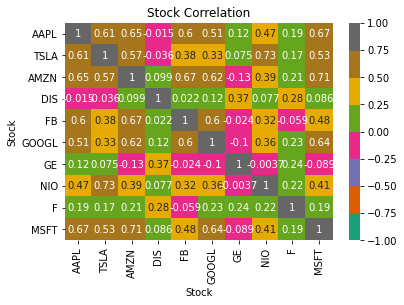

In [283]:
import seaborn as sns

def correlation_map(dataframe):
    stock_corr_plot = sns.heatmap(dataframe, vmin = -1, vmax = 1, cmap = "Dark2", annot= True)
    stock_corr_plot.set(
    xlabel = "Stock", 
    ylabel = "Stock",
    title = "Stock Correlation")

correlation_map(correlation)

In [284]:
portfolio_mean = daily_returns.mean()

portfolio_returns = daily_returns.sum()

In [285]:
#Portfolio 1 will always be evenly distributed

portfolio_weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

In [286]:
#The Portfolio Daily Return will give the total portfolio change per day

daily_returns["Portfolio 1"] = daily_returns.dot(portfolio_weights)

In [287]:
portfolio_total_return = daily_returns["Portfolio 1"].sum()

In [288]:
Portfolio_1 = daily_returns["Portfolio 1"]
Portfolio_1 = pd.DataFrame(Portfolio_1)

## Beginning New Portfolio

In [289]:
daily_returns.drop(daily_returns.columns[[10]], axis=1, inplace=True)
portfolio2_weights = [.2, .05, .25, .05, .2, .05, .05, .05, .05, .05]
daily_returns["Portfolio 2"] = daily_returns.dot(portfolio2_weights)

In [290]:
Portfolio_2 = daily_returns["Portfolio 2"]
Portfolio_2 = pd.DataFrame(Portfolio_2)

In [292]:
p1_and_p2 = pd.concat([Portfolio_1,Portfolio_2],axis=1)
p1_and_p2

,Portfolio 1,Portfolio 2
time,,
2021-01-20 00:00:00-05:00,0.027194,0.031280
2021-01-21 00:00:00-05:00,0.010377,0.016469
2021-01-22 00:00:00-05:00,0.009806,0.007065
2021-01-25 00:00:00-05:00,0.003327,0.007990
2021-01-26 00:00:00-05:00,0.005777,0.007362
...,...,...
2021-05-03 00:00:00-04:00,-0.004092,-0.006912
2021-05-04 00:00:00-04:00,-0.020652,-0.021861
2021-05-05 00:00:00-04:00,-0.002482,-0.005082


In [307]:
total_returns = p1_and_p2.sum()

In [301]:
import plotly.express as px

In [310]:
bar_returns = px.bar(total_returns, range_y= (-.01,.15),title="Portfoli Returns", labels={"value":"Return Percentage", "index":"Portfolio"}, width=(500), height=(500))
bar_returns